In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [18]:
pokemon=pd.read_csv('pokemons_data.csv',index_col=0)
combats=pd.read_csv('combats.csv')

In [19]:
pokemon.head()

,Name,Hit Points,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
#,,,,,,,,
1,Bulbasaur,45,49,49,65,65,45,0
2,Ivysaur,60,62,63,80,80,60,0
3,Venusaur,80,82,83,100,100,80,0
4,Mega Venusaur,80,100,123,122,120,80,0
5,Charmander,39,52,43,60,50,65,0


In [20]:
cols = ["First_pokemon","Second_pokemon","Winner"]
new_combat_data=combats[cols].replace(pokemon.Name)
new_combat_data.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


In [21]:
combats.Winner[combats.Winner == combats.First_pokemon] = 0
combats.Winner[combats.Winner == combats.Second_pokemon] = 1

In [22]:
def normalization(data_df):
    stats=["Hit Points","Attack","Defense","Sp. Atk","Sp. Def","Speed","Legendary"]
    stats_df=pokemon[stats].T.to_dict("list")
    one=data_df.First_pokemon.map(stats_df)
    two=data_df.Second_pokemon.map(stats_df)
    temp_list=[]
    for i in range(len(one)):
        temp_list.append(np.array(one[i])-np.array(two[i]))
    new_test = pd.DataFrame(temp_list, columns=stats)
    for c in stats:
        description=new_test[c].describe()
        new_test[c]=(new_test[c]-description['min'])/(description['max']-description['min'])
    return new_test

In [23]:
data=normalization(combats)
data = pd.concat([data,combats.Winner], axis=1)

In [24]:
x_label=data.drop("Winner",axis=1)
y_label=data["Winner"]

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.25, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(x_train, y_train)
pred = model.predict(x_test)
print('Accuracy of ', accuracy_score(pred, y_test)*100)

Accuracy of  94.96


In [27]:
test_data=pd.read_csv('tests.csv')

In [28]:
new_test_data=test_data[["First_pokemon","Second_pokemon"]].replace(pokemon.Name)
new_test_data.head()

,First_pokemon,Second_pokemon
0,Seaking,Lickitung
1,Ferrothorn,Quagsire
2,Thundurus Therian Forme,Hitmonlee
3,Flaaffy,Maractus
4,Spearow,Alomomola


In [29]:
final_data=normalization(test_data)
pred=model.predict(final_data)
test_data["Winner"]=[test_data["First_pokemon"][i] if pred[i]==0 else test_data["Second_pokemon"][i] for i in range(len(pred))]

In [30]:
combats_name = test_data[cols].replace(pokemon.Name)
combats_name[63:64]

,First_pokemon,Second_pokemon,Winner
63,Mr. Mime,Psyduck,Mr. Mime


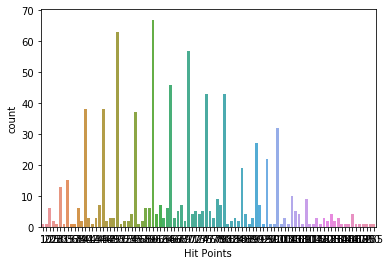

In [32]:
sb.countplot(data = pokemon, x = 'Hit Points');

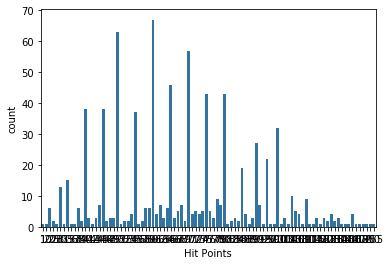

In [33]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'Hit Points', color = base_color)

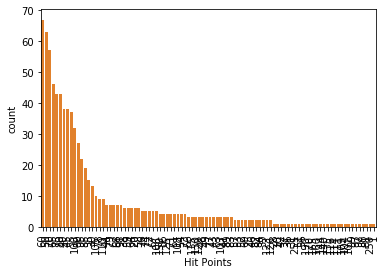

In [38]:
base_color = sb.color_palette()[1]
gen_order = pokemon['Hit Points'].value_counts().index
sb.countplot(data = pokemon, x = 'Hit Points', color = base_color, 
              order = gen_order)
plt.xticks(rotation=90);

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

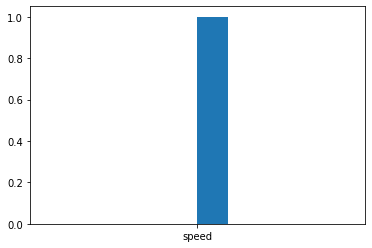

In [44]:
plt.hist(data = pd, x = 'speed')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <a list of 20 Patch objects>)

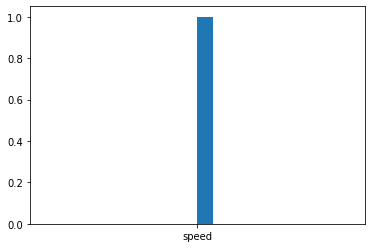

In [46]:
plt.hist(data = pd, x = 'speed', bins = 20)